# Finding Faces
In this project we find faces on all the images that have a particular string.
To find faces we use Open-CV
For recognizing text we use pytesseract
Read images stored in zip file with zipfile.
Also a project for Course 5 Python 3 Specialization

In [1]:
# To read images stored in zipfile
import zipfile

# To display images in jupyter
from IPython.display import display

#For image manipulation 
from PIL import Image

# To recognize and read text in images
import pytesseract
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# For face recognition
import cv2 as cv

# To work with arrays 
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


In [2]:
# To display open cv images

def dispimg(img,name="Check"):
    '''Display opencv image'''
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

#To display images stored as numpy arrays    
def dispcv(mat):
    '''Display opencv image in jupyter'''
    img=Image.fromarray(mat)
    display(img)

In [3]:
# Takes the images reads the text and returns all the words in the image in the form of a list. 
# The image passed is a pillow object
def words(image):
        import string
        text=pytesseract.image_to_string(image)
        lst_w,lst_words,lstwords=[],[],[]
        lst=text.strip().split("\n\n")
        for l in lst:
            lst_w.extend(l.strip().split(" "))
        for l in lst_w:
            lst_words.extend(l.strip().split("\n"))
        for i in lst_words:
            cleanword=""
            for char in i:
                if (char in string.ascii_lowercase) or (char in string.ascii_uppercase):
                    cleanword=cleanword+char
                else :
                    break
            lstwords.append(cleanword)        
        return(lstwords)


        
# Takes a pillow images object and returns a list of all the faces on the image
def face_class(image,thresh=200,scale=2.75):
    temp=np.asarray(image.convert("L"),dtype='uint8')
    faces=face_cascade.detectMultiScale(temp,scale)
    cropped=[]
    for x,y,w,h in faces:
        cropped.append(image.crop((x,y,x+w,y+h)))
    return cropped
    

In [4]:
#If you want to experiment with a single file you can use this code

###One-File
# fname='readonly/small_img.zip' #Smaller file
# # fname='readonly/images.zip' #Larger file of size about 200 MB
# myzip=zipfile.ZipFile(fname,'r')
# images,k={},0
# for f in myzip.namelist():
#     with myzip.open(f) as myfile:
#         if k==2:
#             tmp=Image.open(myfile).convert("RGB")
#             l1=words(tmp)
#             if f in ['a-3.png','a-10.png']:
#             h,b,scale=tmp.height,tmp.width,0.9
#             tmp=tmp.resize((int(b*scale),int(h*scale)))
#             thresh,scale=225,1.5
#             l2=face_class(tmp,thresh,scale)
#             images[f]=[l1,l2]
#             k=k+1
#             break
#         k=k+1
# #         display(img)
# # print(k,"images loaded to the dictionary sucessfully")
# #print(images)
# for i in images.keys():
# #     print(images[i])
#     print("Text:\n",images[i][0])
#     temp=images[i][1]
# #     print(temp)
#     for t in temp:
#         display(t)

Results found in file a-0.png


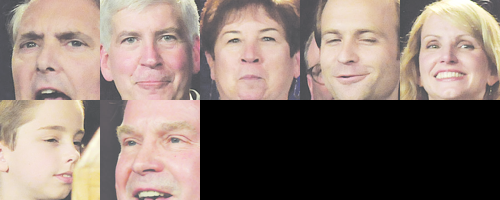

Results found in file a-3.png


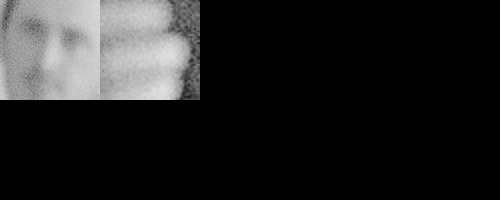

In [5]:

# inp=input("Enter a word:")
inp="Christopher"


fname='readonly/small_img.zip' #Smaller file
# fname='readonly/images.zip' #Larger file of size about 200 MB

myzip=zipfile.ZipFile(fname,'r')

for f in myzip.namelist():
    with myzip.open(f) as myfile:
        tmp=Image.open(myfile).convert("RGB")
        l1=words(tmp)
        for l in l1:
            if inp in l :
                thresh,scale=250,2.1
                if f in ['a-3.png','a-10.png']:
                    h,b,s=tmp.height,tmp.width,0.8
                    tmp=tmp.resize((int(b*s),int(h*s)))
                l2=face_class(tmp,thresh,scale)
                print("Results found in file",f)
                if len(l2)==0:
                    print("But there were no faces in that file!")
                    break
                first_img=l2[0]
                width,height=500,200
                wd,ht,x,y=100,100,0,0
                col_img=Image.new(first_img.mode,(width,height))
                for temp in l2:
                    temp=temp.resize((wd,ht))
                    col_img.paste(temp,(x,y))
                    x=x+wd
                    if x==width:
                        x=0
                        y=y+ht
                display(col_img)
                break


By changing the scale value I was able to extract an extra face for the above test case

Results found in file a-0.png


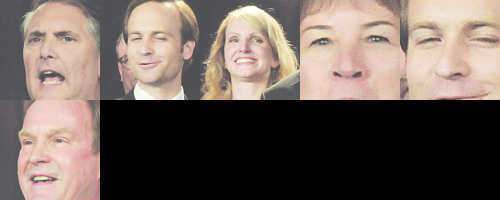

Results found in file a-1.png


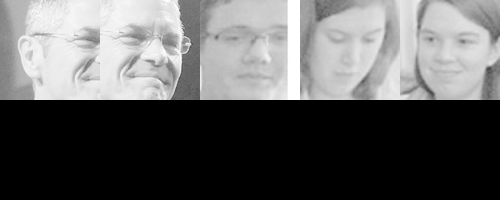

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


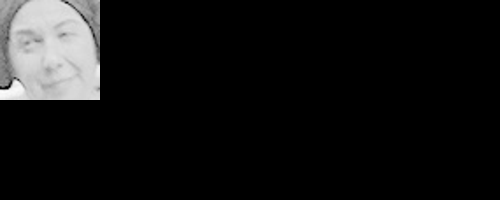

Results found in file a-2.png


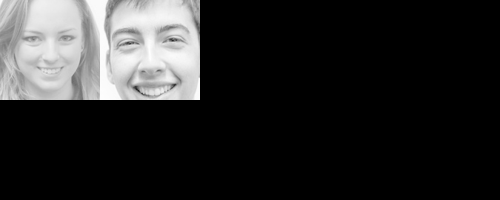

Results found in file a-3.png


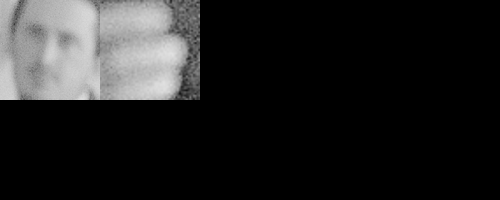

Results found in file a-8.png
But there were no faces in that file!


In [6]:
# inp=input("Enter a word:")
# inp="Christopher"
inp="Mark"

# fname='readonly/small_img.zip' #Smaller file
fname='readonly/images.zip' #Larger file of size about 200 MB
myzip=zipfile.ZipFile(fname,'r')

for f in myzip.namelist():
    with myzip.open(f) as myfile:
        tmp=Image.open(myfile).convert("RGB")
        l1=words(tmp)
        for l in l1:
            if inp in l :
#                 print("For Face:",f)
                thresh,scale=100,2.37
                if f in ['a-3.png','a-10.png']:
                    h,b,s=tmp.height,tmp.width,0.8
                    tmp=tmp.resize((int(b*s),int(h*s)))
                l2=face_class(tmp,thresh,scale)
    #             print(f,l2)
                print("Results found in file",f)
                if len(l2)==0:
                    print("But there were no faces in that file!")
                    break
                first_img=l2[0]
                width,height=500,200
                wd,ht,x,y=100,100,0,0
                col_img=Image.new(first_img.mode,(width,height))
                for temp in l2:
            #         display(temp)
                    temp=temp.resize((wd,ht))
                    col_img.paste(temp,(x,y))
            #         display(col_img)
                    x=x+wd
                    if x==width:
                        x=0
                        y=y+ht
                display(col_img)
                break
